In [1]:
#updated 2025-07-24 11:58
from heat_pump_model import *
from libraries import * 
from refrigerant_properties import *
import numpy as np
from utilities.unit_defs import Q_

In [2]:
#process energy rate csv into 8760 energy cost
df = pd.read_csv("utilities/Seattle_City_Light_Medium_Business_energy.csv")
rate_kwh = Q_(df["energy_rate"].values, "USD / kWh")
#assign the csv with the demand charges
demand_charge_filepath="utilities/Seattle_City_Light_Medium_Business_demand.csv"
#assign the csv with the load profile
df2 = pd.read_csv("Thermal Loadshapes/15bbl_3batch_day_Stoup.csv")
load_profile= Q_(df2["load_kW"].values, "kW")

In [3]:
hp_test = heat_pump()
hp_test.construct_yaml_input_quantities('heat_pump_model_inputs.yml')
hp_test.hot_temperature_desired = Q_(np.array([120]*8760), 'degC')
hp_test.hot_temperature_minimum = Q_(np.array([95]*8760), 'degC')
hp_test.carnot_efficiency_factor = Q_('0.55')
hp_test.carnot_efficiency_factor_flag = False
hp_test.refrigerant = 'R234a'
#variable electicity rates with demand charges
hp_test.hourly_utility_rate = rate_kwh
hp_test.demand_charge_file=demand_charge_filepath
hp_test.process_heat_requirement=load_profile


hp_test.run_all('hp_test')


Calculate COP Called
Average Theoretical COP:  3.791904761904761 dimensionless
Average Estimated COP:  2.654333333333333 dimensionless
Calculate Heat Pump Costs
storage energy: 274.1917808219178
Storage Volume: 7622.43 l
Saturation Pressure: 6.18 bar
20256.689112359454 USD
LCOH: 22.91 $/MMBtu
System Power: 31.76 kW
System Storage: 411.29 kWh
Heat Pump Cost: 12,705.88 $
Storage Cost: 5,030.81 $
Steam Dischage Cost: 2,520.00 $
Total Capital Cost: 20,256.69 $
Capacity Factor: 0.153
One Year Fixed O&M Costs: 1,270.59 $/yr
One Year Generation&Transmission Costs: 3,437.22 $
Demand Chargess:  257.00 $
One Year Energy Costs: 3,694.22 $/yr
One Year Operating Costs: 4,964.81 $/yr
Annual Heat Output: 320.60 MMBtu
Lifetime LCOH: 22.91 $/MMBtu
Writing all output to a file


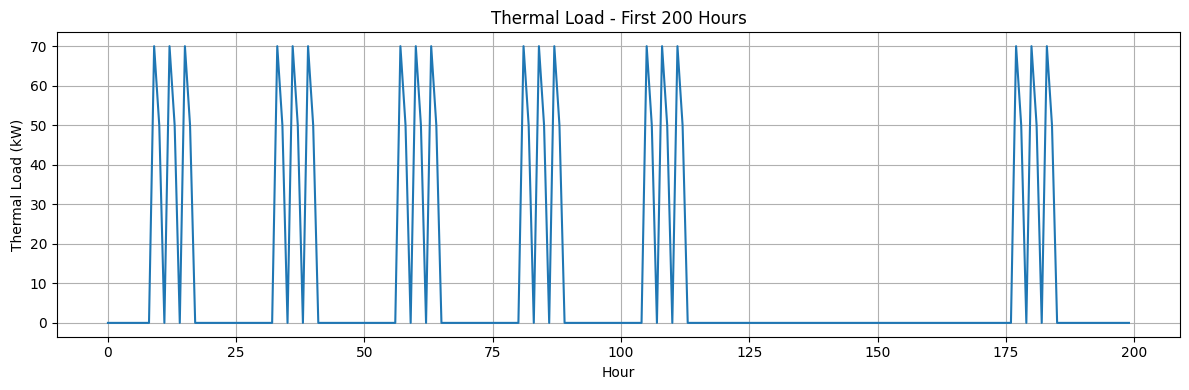

In [4]:
import matplotlib.pyplot as plt

# Plot the first 200 hours of thermal load
plt.figure(figsize=(12, 4))
plt.plot(hp_test.process_heat_requirement[:200].magnitude)
plt.title("Thermal Load - First 200 Hours")
plt.xlabel("Hour")
plt.ylabel(f"Thermal Load ({hp_test.process_heat_requirement.units:~})")
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
from gas_model import *
gas_test = gas_heater()
gas_test.construct_yaml_input_quantities('gas_model_inputs.yml')
gas_test.hot_temperature = Q_(np.array([120]*8760), 'degC')
gas_test.cold_temperature = Q_(np.array([95]*8760), 'degC') #in the gas case 'cold temp' is the return to the boiler
gas_test.process_heat_requirement=load_profile
gas_test.run_all('gas_test')

print(gas_test.capital_cost)

Calculate Energy and Mass Called
Hot Mass Flow Average: 0.00463 kg/s
Average Power Draw of Gas Heater: 13.408 kW
Maximum Power Draw of Gas Heater: 87.500 kW
Annual Gas in: 0.4 MMSCF
Capital Cost: 0.00 $
Capacity Factor: 0.153
One Year Fixed O&M Costs: 11.94 $/yr
One Year Variable O&M Costs: 3.21 $/yr
One Year Energy Costs: 8,323.70 $/yr
One Year Operating Costs: 8,338.85 $/yr
Lifetime LCOH: 26.01 $/MMBtu
Year 1 Emissions: 21.24 ton/yr
Writing all output to a file
0.0 USD
